# Import important libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #데이터 시각화
import cv2
import os
import tensorflow as tf
import random

# Dataset

### Keras에서 제공하는 Adience 데이터 셋 사용

In [3]:
data_parent = '경로작성'
print(os.listdir(data_parent))

['AdienceBenchmarkGenderAndAgeClassification', 'fold_1_data.txt', 'fold_0_data.txt', 'fold_4_data.txt', '__MACOSX', 'fold_2_data.txt', 'fold_3_data.txt', 'faces']


In [4]:
import pandas as pd

# 상대 경로를 사용하여 파일을 읽어옵니다.
data = pd.read_csv("경로작성", sep="\t")
data1 = pd.read_csv("경로작성", sep="\t")
data2 = pd.read_csv("경로작성", sep="\t")
data3 = pd.read_csv("경로작성", sep="\t")
data4 = pd.read_csv("경로작성", sep="\t")

# 데이터 확인
print(data1.head())


         user_id                original_image  face_id        age gender  \
0  114841417@N06  12068804204_085d553238_o.jpg      481  (60, 100)      f   
1  114841417@N06  12068804204_085d553238_o.jpg      482   (48, 53)      m   
2  114841417@N06  12078357226_5fdd9367de_o.jpg      483     (4, 6)      f   
3  114841417@N06  12019067874_0e988248af_o.jpg      483     (4, 6)      f   
4  114841417@N06  12077009614_2490487d2a_o.jpg      484         45      f   

      x    y    dx    dy  tilt_ang  fiducial_yaw_angle  fiducial_score  
0  1141  780   975   976         0                   0             118  
1  1821  283   969   969       -25                  15              35  
2  1788  341   306   306       -10                   0             168  
3     3  183   932   777      -115                   0              27  
4   258  133  1734  1734        15                   0              11  


### 데이터셋 pandas활용하여 concat, 수평으로 결합

In [5]:
total_data = pd.concat([data, data1, data2, data3, data4], ignore_index=True)
print(data.shape)
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)
print(total_data.shape)

(3446, 12)
(3730, 12)
(3894, 12)
(4484, 12)
(3816, 12)
(19370, 12)


In [6]:
total_data.head()

user_id                original_image  face_id       age gender  \
0  113445054@N07  11763777465_11d01c34ce_o.jpg     1322  (25, 32)      m   
1  113445054@N07  11763777465_11d01c34ce_o.jpg     1323  (25, 32)      f   
2  113445054@N07  11763777465_11d01c34ce_o.jpg     1324  (15, 20)      f   
3  113445054@N07  11764005785_f21921aea6_o.jpg     1325  (25, 32)      f   
4  113445054@N07  11763728674_a41d99f71e_o.jpg     1326  (25, 32)      m   

      x    y   dx   dy  tilt_ang  fiducial_yaw_angle  fiducial_score  
0  1102  296  357  357       -15                   0              59  
1  1713  580  325  325        -5                   0             118  
2  1437  664  306  306         5                   0             109  
3   978  229  803  803       -20                 -45              16  
4  1745  910  242  242       -10                   0              55

In [7]:
data.describe()

face_id            x            y           dx           dy  \
count  3446.000000  3446.000000  3446.000000  3446.000000  3446.000000   
mean   1468.835461   919.112014   681.773360   560.560360   560.628265   
std     106.210585   645.883499   434.358154   358.399365   357.300076   
min    1322.000000     0.000000     0.000000    80.000000    80.000000   
25%    1388.000000   465.250000   331.000000   312.000000   312.000000   
50%    1451.500000   808.500000   648.000000   466.000000   472.000000   
75%    1538.000000  1300.000000   976.000000   691.250000   694.000000   
max    1743.000000  8721.000000  2226.000000  3130.000000  3104.000000   

          tilt_ang  fiducial_yaw_angle  fiducial_score  
count  3446.000000         3446.000000     3446.000000  
mean     -9.334010            2.398433       72.891759  
std      74.863682           14.445252       37.003019  
min    -190.000000          -45.000000        5.000000  
25%     -80.000000            0.000000       45.000000  
50%      -5.000000            0.000000       71.000000  
75%       5.000000            0.000000       97.000000  
max     365.000000           45.000000      210.000000

In [8]:
total_data.dtypes

user_id               object
original_image        object
face_id                int64
age                   object
gender                object
x                      int64
y                      int64
dx                     int64
dy                     int64
tilt_ang               int64
fiducial_yaw_angle     int64
fiducial_score         int64
dtype: object

# 데이터 시각화

### 성별

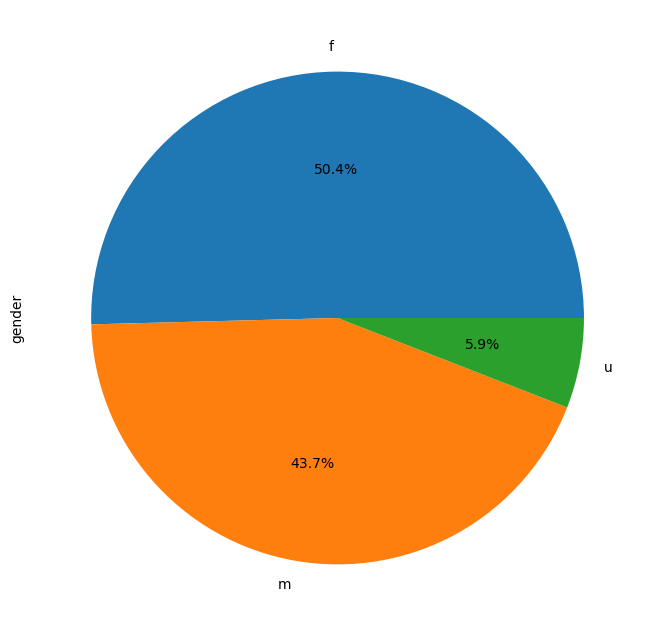

f    9372
m    8120
u    1099
Name: gender, dtype: int64

In [9]:
plt.figure(1, figsize=(8,8))
total_data.gender.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()
total_data.gender.value_counts()

### 나이

<Axes: ylabel='age'>

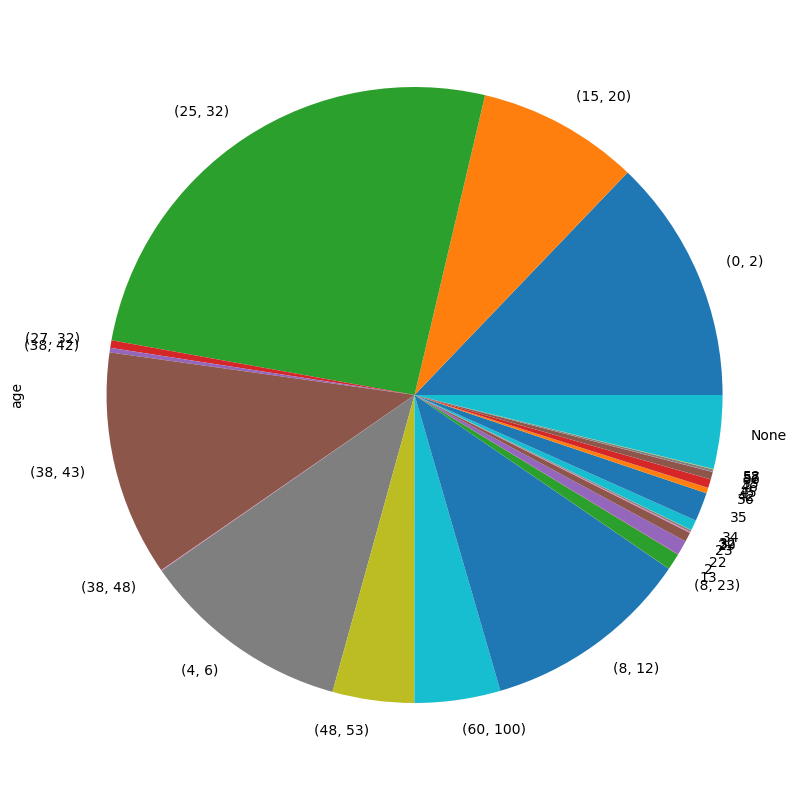

In [10]:
total_data.groupby('age')['age'].count().plot.pie(figsize=(10, 10))

### total_data에서 행을 선택 후 해당 이미지와 나이, 성별 정보 확인

In [ ]:
sample_num = 200
im_name = total_data.iloc[sample_num].original_image
im_path = os.path.join(data_parent, 'faces',str(total_data.iloc[sample_num].user_id), 'coarse_tilt_aligned_face.' + str(total_data.iloc[sample_num].face_id) + '.' + im_name)
print('[+] Image path:', im_path)
image = cv2.imread(im_path)
print('[+] Image shape:', image.shape)
print('[!] Age:', total_data.iloc[sample_num].age, 'Gender:', total_data.iloc[sample_num].gender)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### 랜덤으로 추출하여 확인 후 라벨링

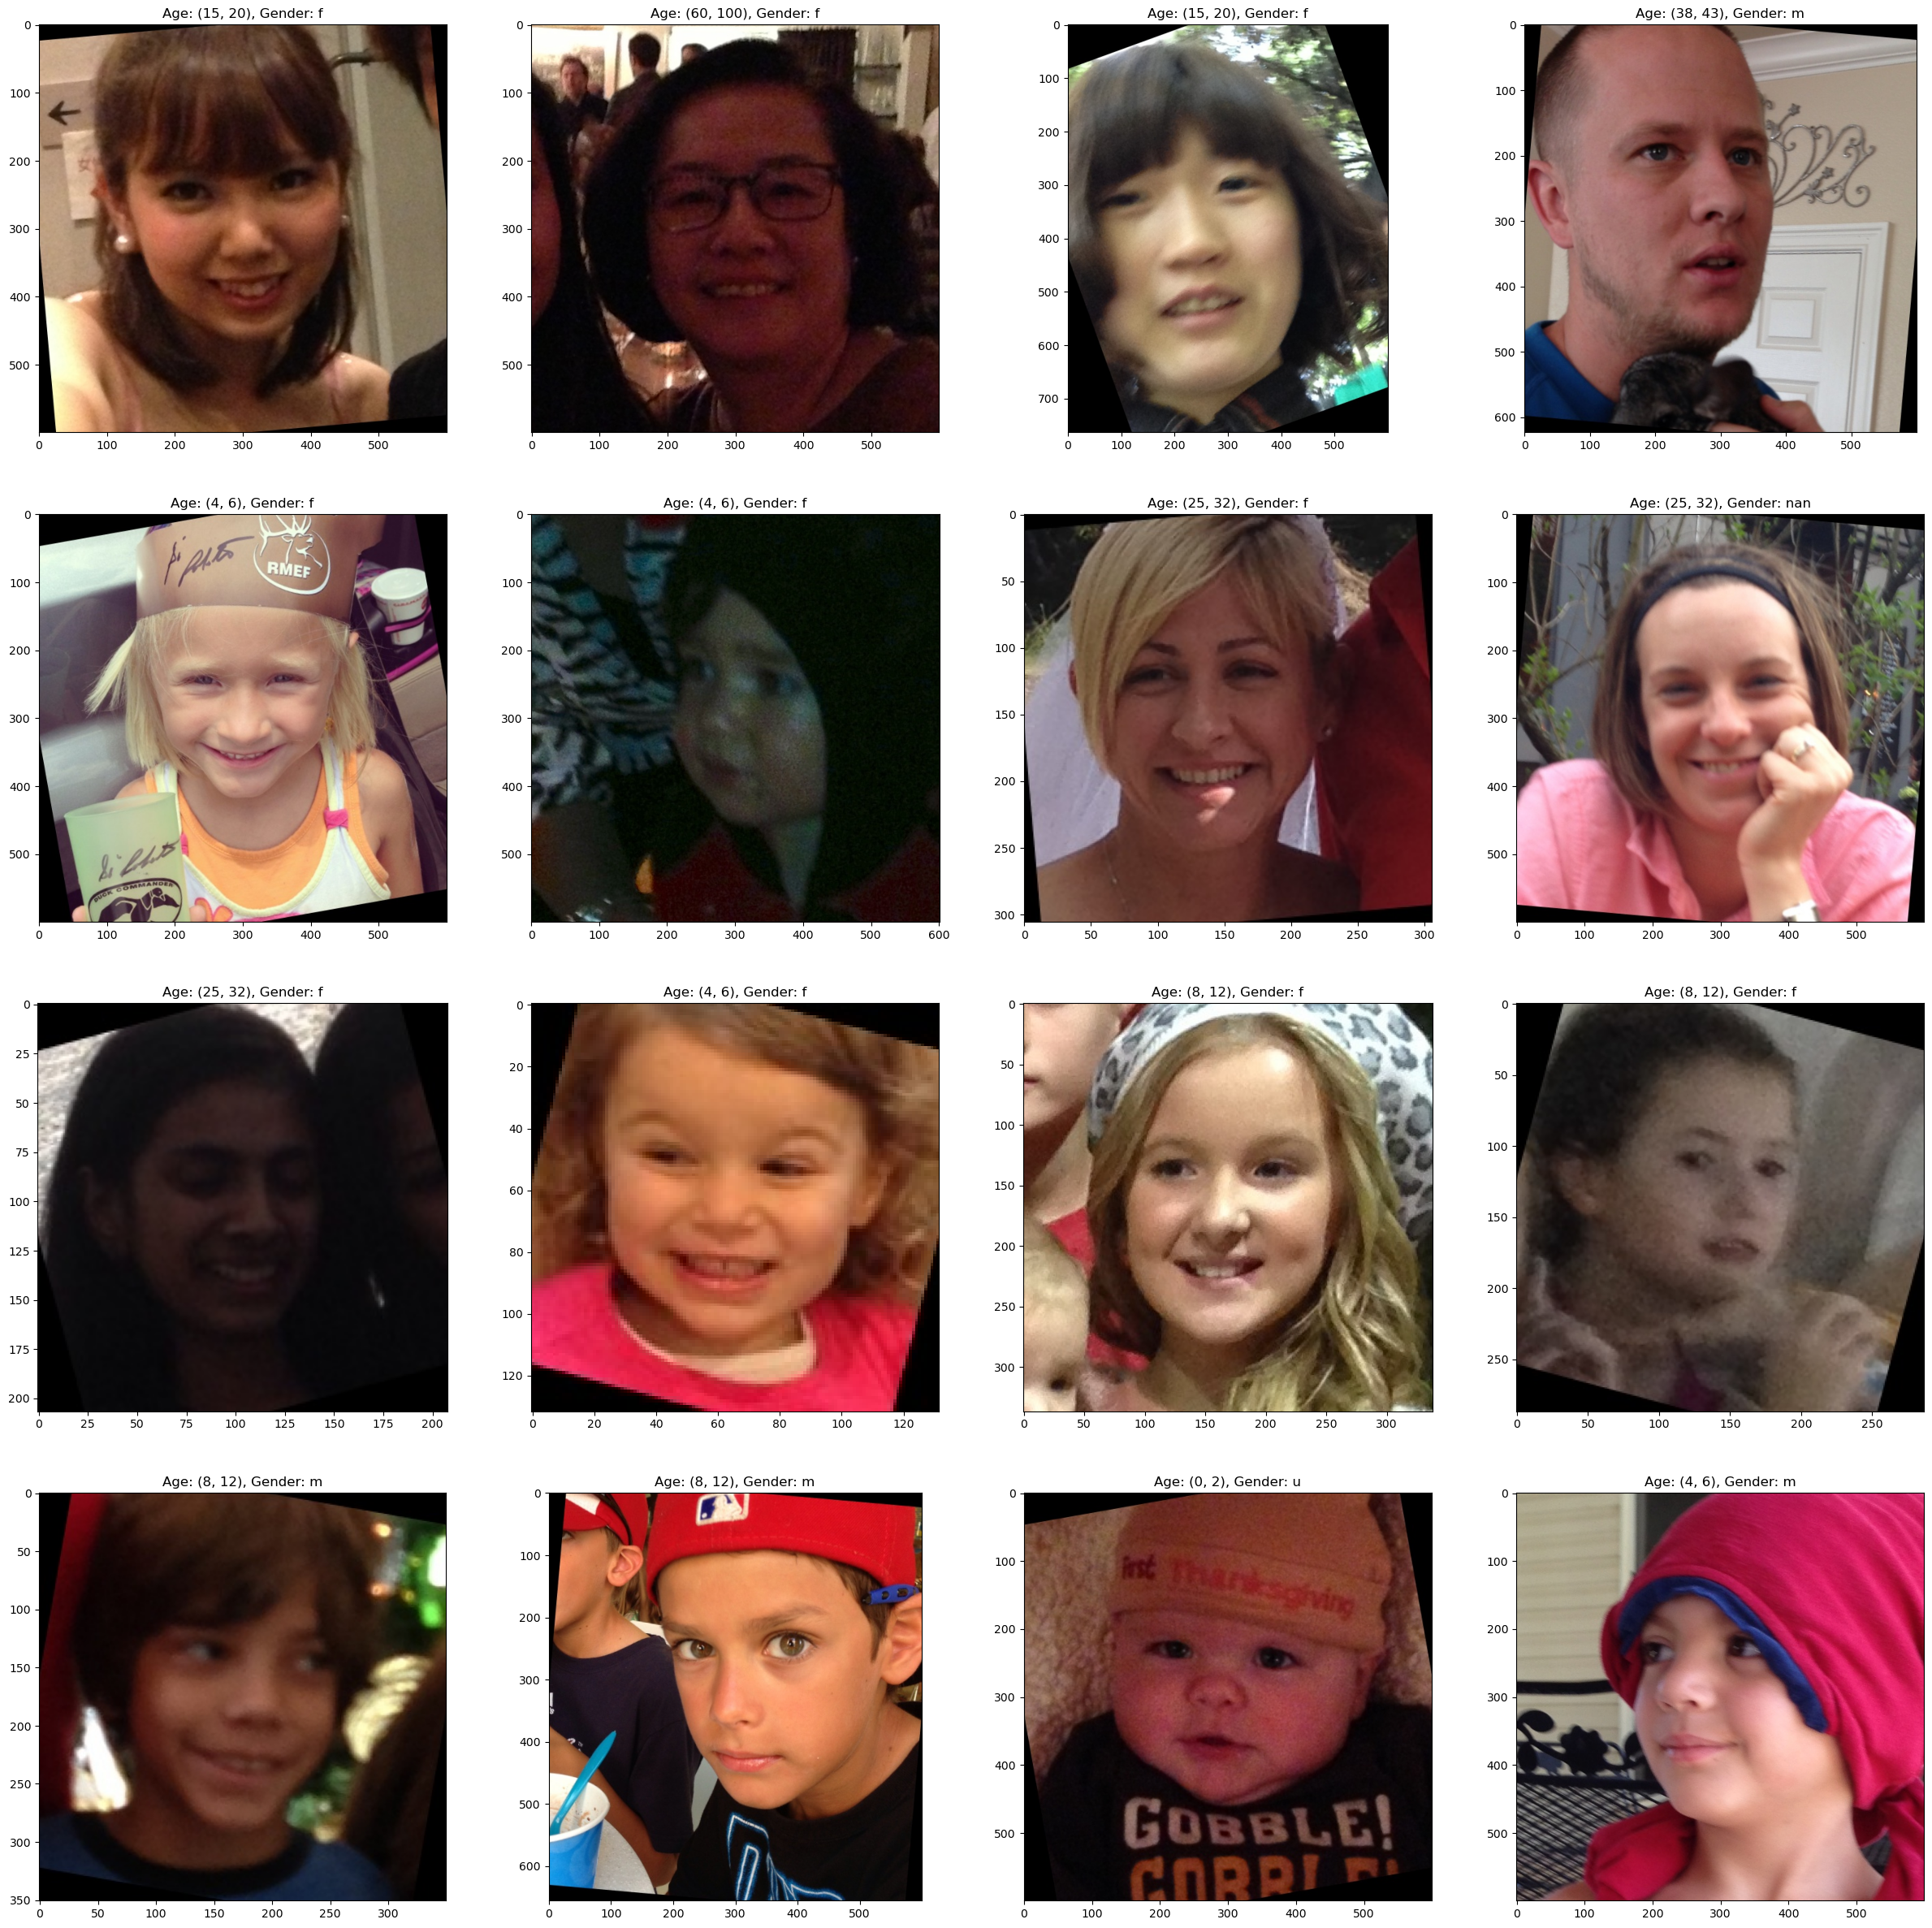

In [12]:
images = []
for _ in range(16):
    sample_num = random.randint(0, len(total_data))
    im_name = total_data.iloc[sample_num].original_image
    im_path = os.path.join(data_parent, 'faces',str(total_data.iloc[sample_num].user_id), 'coarse_tilt_aligned_face.' + str(total_data.iloc[sample_num].face_id) + '.' + im_name)
    image = cv2.imread(im_path)
    age = total_data.iloc[sample_num].age
    gender = total_data.iloc[sample_num].gender
    n_col = 4
    n_rows = 4
    images.append((image, age, gender))
    
fig, axs = plt.subplots(ncols=n_col, nrows=n_rows, figsize=(30,30))
count = 0
for i in range(n_rows):
      for j in range(n_col):
        axs[i][j].imshow(cv2.cvtColor(images[count][0], cv2.COLOR_BGR2RGB))
        axs[i][j].set_title(f'Age: {images[count][1]}, Gender: {images[count][2]}')
        count+=1
plt.show()

# 데이터 매핑

### age_mapping : 나이 범주 정의 리스트
### age_mapping_dic : 나이값 변환을 위한 딕셔너리
### drop_labels : None값이나 알 수 없는 값 저장 배열
### total_data의 age부분 순회하면서 drop_labels에 들어가는 성분 찾고 total_data에서 제거

In [ ]:
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]
age_mapping_dict = {each[0]: each[1] for each in age_mapping}

drop_labels = []
for idx, each in enumerate(total_data.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        total_data.age.loc[idx] = age_mapping_dict[each]
total_data = total_data.drop(labels=drop_labels, axis=0)
total_data.age.value_counts(dropna=False)

### total_data에서 NaN값 제거 및 이미지의 전체 경로 생성

In [14]:
total_data = total_data.dropna()
total_data['full_path'] = total_data.apply(lambda x: os.path.join(data_parent, 'faces', str(x.user_id), 'coarse_tilt_aligned_face.' + str(x.face_id) + '.' + x.original_image), axis=1)
total_data.age.unique(), len(total_data.age.unique()), total_data.gender.unique()

(array(['25-32', '15-20', '38-43', '60+', '48-53', '8-13', '4-6', '0-2'],
       dtype=object),
 8,
 array(['m', 'f', 'u'], dtype=object))

### gender 및 age열에 있는 문자열 값을 정수로 변환

In [15]:
gender_map = {'f':0, 
             'm':1,
             'u':2}
age_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}
total_data.gender = total_data.gender.replace(gender_map)
total_data.age=total_data.age.replace(age_map)

### gender, age 열에 있는 값을 리스트로 변환하여 gender_labels, age_labels에 저장

In [ ]:
gender_labels = total_data.gender.values.tolist()
age_labels= total_data.age.values.tolist()
train_paths = total_data.full_path.values.tolist()
len(gender_labels), gender_labels[0],len(age_labels),age_labels[0], train_paths[0]

# 신경망 구축

In [17]:
from sklearn.preprocessing import OneHotEncoder

## 훈련 데이터의 이미지 경로, 성별 라벨, 나이 라벨을 섞고, 나이 라벨을 one-hot encoding 형식으로 변환

### 리스트 묶어서 튜플의 리스트를 생성
### shuffle_list를 샘플링하여 섞음
### 3행 섞인 데이터를 다시 풀어서 각각의 리스트로 나눔
### age_labels를 Numpy 배열로 변환하고 2D 배열 형태로 변환, reshape함수 사용
### 클래스를 인스턴스화, 다중 범주형 변수를 이진화(one-hot encoding)하기 위해 사용
### 메서드를 사용하여 나이 라벨을 one-hot encoding 형식으로 변환, toarray()를 사용하여 희소 행렬을 밀집 배열로 변환

In [18]:
shuffle_list = list(zip(train_paths, gender_labels,age_labels))
shuffle_list = random.sample(shuffle_list, len(train_paths))
train_paths, gender_labels,age_labels = zip(*shuffle_list)
age_labels = np.array(list(age_labels)).reshape((-1, 1))
enc= OneHotEncoder()
age_labels = enc.fit_transform(age_labels).toarray() 

### 훈련 데이터와 검증 데이터를 구분, 75%할당

In [19]:
train_split = 0.75
train_sample = int(train_split * len(total_data))

train_data = train_paths[:train_sample]
validation_data = train_paths[train_sample:]

train_labels_gender = gender_labels[:train_sample]
validation_labels_gender = gender_labels[train_sample:]

train_labels_age=age_labels[:train_sample]
validation_labels_age=age_labels[train_sample:]
print("train data count:")
print(len(train_data), len(train_labels_gender), len(train_labels_age))
print("validation data count:")
print(len(validation_data), len(validation_labels_gender), len(validation_labels_age))

train data count:
13913 13913 13913
validation data count:
4638 4638 4638


In [20]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import multiprocessing
import cvlib as cv

### TensorFlow의 tf.data.Dataset.from_tensor_slices를 사용하여 훈련 세트와 검증 세트를 위한 tf.data.Dataset 객체를 생성
### 주석처리는 성별관련

In [ ]:
# train_dataset = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_gender),list(train_labels_age)))
# validation_dataset = tf.data.Dataset.from_tensor_slices((list(validation_data), list(validation_labels_gender),list(validation_labels_age)))
train_dataset = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_age)))
validation_dataset = tf.data.Dataset.from_tensor_slices((list(validation_data),list(validation_labels_age)))

### 훈련 데이터셋에서 하나의 샘플을 가져와서 해당 샘플의 이미지 경로(path)와 나이 라벨(target1)을 출력
### 역시 주석은 성별

In [ ]:
# for path, target1,target2 in train_dataset.take(1):
#     print(path, target1,target2)
for path, target1 in train_dataset.take(1):
    print(path, target1)

## 이미지 전처리
### 채널 수가 3인 RGB 이미지로 변환
### 사이즈 정의

In [23]:
# def preprocess_func(path, label_gender,label_age):
#     image = tf.io.read_file(path)
#     image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.resize(image, [128, 128]) / 255.0
        
#     return image, label_gender, label_age

def preprocess_func(path, label_age):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128]) / 255.0
        
    return image, label_age

In [24]:
import multiprocessing

In [25]:
train_batches = train_dataset.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(512).prefetch(tf.data.experimental.AUTOTUNE)
validation_batches = validation_dataset.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(512).prefetch(tf.data.experimental.AUTOTUNE)

### 훈련 데이터셋에서 하나의 배치(batch)가져와서 이미지의 차원 중 크기가 1인 차원 제거
### 첫번째 이미지의 나이 라벨 출력

2023-11-29 13:45:58.489569: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


(512, 128, 128, 3) (512, 8)
tf.Tensor([0. 1. 0. 0. 0. 0. 0. 0.], shape=(8,), dtype=float64)


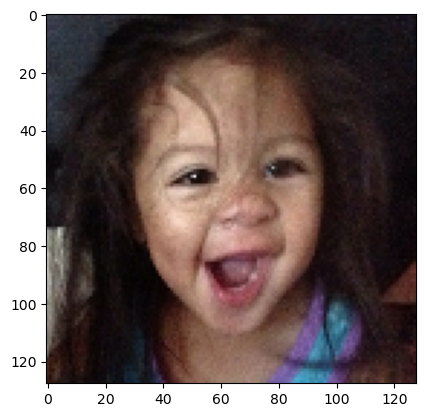

2023-11-29 13:45:58.808568: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [26]:
# for image, target1,target2 in train_batches.take(1):
#     print(image.shape, target1.shape,target2.shape)
#     image = tf.squeeze(image[0])
#     print(target1[0])
#     print(target2[0])
#     plt.imshow(image)
#     plt.show()
#     break

for image, target1 in train_batches.take(1):
    print(image.shape, target1.shape)
    image = tf.squeeze(image[0])
    print(target1[0])

    plt.imshow(image)
    plt.show()
    break

## CNN 신경망

### 1층 128*128 크기의 이미지에 대한 첫번째 컨볼루션 레이어, 8개의 필터 필터의 크기는 3X3, 'same' padding, strides를 2로 줘서 이미지 공간 크기를 줄임
### 2층 128*128 크기의 이미지에 대한 두번째 컨볼루션 레이어, 16개의 필터 필터의 크기는 3X3, 'same' padding, strides를 기본값인 1
### 3층 128*128 크기의 이미지에 대한 첫번째 컨볼루션 레이어, 32개의 필터 필터의 크기는 3X3,'same' padding, strides를 기본값인 1
### 4층 128*128 크기의 이미지에 대한 첫번째 컨볼루션 레이어, 64개의 필터 필터의 크기는 3X3, 'same' padding, strides를 기본값인 1
### MaxPooling은 공간 차원을 줄이기 위한 것
### tf.keras.layers.Flatten(): 다차원의 데이터를 1차원으로 평탄화하는 레이어
### model.compile : 모델을 컴파일 Adam 옵티마이저를 사용하며, 손실 함수로는 Categorical Crossentropy를 사용합니다. 정확도(accuracy)를 평가 지표로 설정

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 3, padding='same', strides=2, activation='relu', input_shape=(128, 128, 3)),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.35),
    
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.45),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation = 'softmax')
])

model.compile(optimizer='adam', loss= tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                    

## 함수를 사용하여 모델의 아키텍처를 그래픽으로 시각화

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

## 학습

In [29]:
history = model.fit(train_batches, epochs=20, validation_data = validation_batches)

Epoch 1/20


2023-11-29 13:45:59.188155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - ETA: 0s - loss: 1.9080 - accuracy: 0.2858

2023-11-29 13:46:03.334571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 6s 189ms/step - loss: 1.9080 - accuracy: 0.2858 - val_loss: 1.8122 - val_accuracy: 0.3238
Epoch 2/20
28/28 [==============================] - 2s 82ms/step - loss: 1.6764 - accuracy: 0.3855 - val_loss: 1.6627 - val_accuracy: 0.3939
Epoch 3/20
28/28 [==============================] - 2s 82ms/step - loss: 1.5255 - accuracy: 0.4354 - val_loss: 1.5256 - val_accuracy: 0.4213
Epoch 4/20
28/28 [==============================] - 2s 82ms/step - loss: 1.4054 - accuracy: 0.4785 - val_loss: 1.4546 - val_accuracy: 0.4439
Epoch 5/20
28/28 [==============================] - 2s 81ms/step - loss: 1.3157 - accuracy: 0.5118 - val_loss: 1.4139 - val_accuracy: 0.4618
Epoch 6/20
28/28 [==============================] - 2s 80ms/step - loss: 1.2468 - accuracy: 0.5381 - val_loss: 1.4270 - val_accuracy: 0.4666
Epoch 7/20
28/28 [==============================] - 2s 80ms/step - loss: 1.1907 - accuracy: 0.5574 - val_loss: 1.3975 - val_accuracy: 0.4713
Epoch 8/20
28/28 [=====

## 학습 결과 그래프

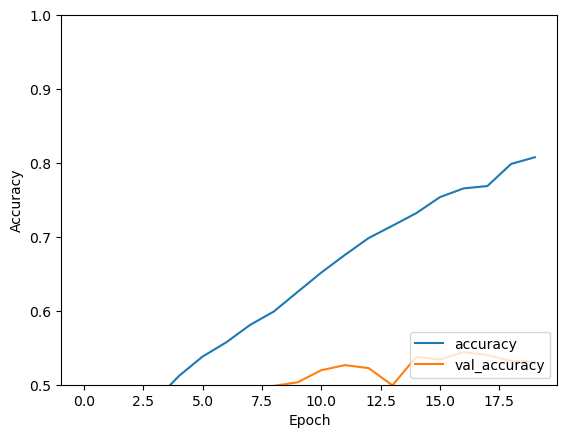

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# 모델 검증
## 데이터셋에 없는 이미지 넣어 확인

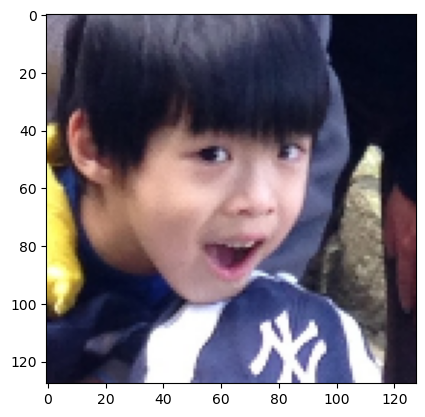

In [31]:
# image_path_test = "경로작성"
# image = cv2.imread(image_path_test)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = cv2.resize(image, (128, 128)) / 255.0
# plt.imshow(image)
# plt.show()
image_path = validation_data[7]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (128, 128)) / 255.0
plt.imshow(image)
plt.show()


In [32]:
image = np.expand_dims(image, 0)
prediction = model.predict(image)

1/1 [==============================] - 0s 93ms/step


2023-11-29 13:46:48.548334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [33]:
index = np.argmax(prediction)
decoding = {0:'0-2', 1:'4-6', 2:'8-13',3:'15-20',4:'25-32',5:'38-43',6:'48-53',7:'60+'}

print('[+] prediction is :', decoding[index]) 
# print(validation_data[7].age_labels)

[+] prediction is : 15-20


# GPU사용확인

In [ ]:
import tensorflow as tf 
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())